# U.S. Medical Insurance Costs Portfolio Project - P. Brister


OBJECTIVE/GOAL: 

In this project, I will gain insight on the various attributes (AGE/SEX/BMI/REGION/SMOKER/CHILDREN) that affect the cost of medical insurance in the U.S.
                                        
                                        
                                        WORKFLOW:
                                   1. Project Obectives: 
       
                                   2. Data Acquistion:
              
                                   3. Data Explortation 
             
                                   4. Descriptive Statistics 
             
                                   5. Exploratory Data Analysis(EDA):
              
                                   6. Conclusions and insights: 
          

 #                    Part 1-3: Data Acquistion / Data Exploration  

What specific insights are we looking to gain from understaning the cost of medical insurance:
                       
                       • What is the average cost of insurance?
                       
                       • How much do male and females pay? Is there a significant difference?
                       
                       • Does smoking impact insurance cost? 
                      
                       • Is there a relationship between the cost of insurance and age? 
                       
                       • Does BMI have an impact on cost? 
                      
                       • Does the number of children determine whether a patient pays more in insurance? 
                       
                       • What is the average cost of insurance per region? 
           


Import modules and insurance.csv file 

In [2]:
#Import modules 
import pandas as pd 
import numpy as py 
import seaborn as sns 
import matplotlib.pyplot as plt 


#Open and create dataframe 
medical_insurance = pd.read_csv('insurance.csv')


In [3]:
#Get familiar with the dataset/ understand its structure, size and features. 
print(medical_insurance.head())

#Review datatypes 
print(medical_insurance.info())


#Identifying if there are any missing data entries
null_data = medical_insurance.isnull().sum()
print(null_data)
    

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges


The struture of the dataset is presented in a useable and readable way. The data was uploaded into a dataframe. As shown above, each column and row is seperated by indexs. The columns are seperated by labels(age, sex, bmi, children, smoker, region and charges) while the rows are seperated by numbers starting from 0 - 1337. 

There are 1338 entries. And the data is presented with string and int/float dtypes. 

There are no missing values.



# Part 4: Descriptive Stats 
 
               •Calculate basic desriptive statistics such as mean, median, mode and standard deviation for relevant variables 
               
               •Analyze the distribution of insurance costs
               
 

In [4]:
#Descriptive Stats for Age, BMI, Children and Smoker
descriptive_stats = medical_insurance[['age', 'bmi', 'children', 'smoker', 'charges']].describe(include='all').round(2)


Average Patient Age: 39.21


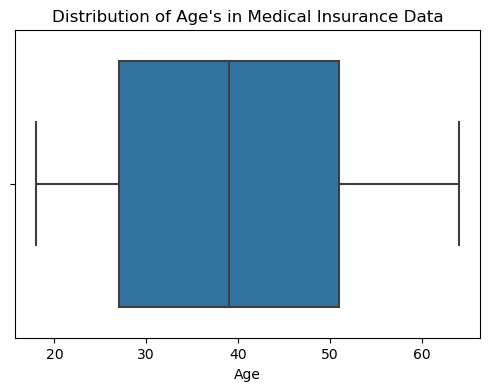

count     1338.00
unique        NaN
top           NaN
freq          NaN
mean        39.21
std         14.05
min         18.00
25%         27.00
50%         39.00
75%         51.00
max         64.00
Name: age, dtype: float64


In [5]:
# Function that calculates the average ages of the patients in insurance.csv
def analyze_ages():
    total_age = 0 
    #iterate through all ages in the list 
    for age in medical_insurance.age: 
        #sum of the total age
        total_age += int(age) 
        # return total age divided by the length of the patient list
    return ('Average Patient Age: {}'.format(round(total_age/len(medical_insurance), 2)))  
print(analyze_ages())

#Visualize Data
plt.figure(figsize=(6,4))
sns.boxplot(x=medical_insurance.age)
plt.xlabel('Age')
plt.title("Distribution of Age's in Medical Insurance Data")
plt.show()


print(descriptive_stats['age'])

Our data represents that out of 1338 patients recieved in the dataset the average age is 39. It indicates that the youngest age is 18 and the oldest is 64. 

25% percent of our patients are 27 years old or younger, 50% are below the age of 39 and 75% are 51 years old or younger. 

The standard deviation is 14.05 years which tell us that the ages within the data set have a large spread indicating that we have a diverse range of ages within our dataset. 

There are 676 males and 662 in the dataset. Men take up 50.52% and woment take up 49.48%


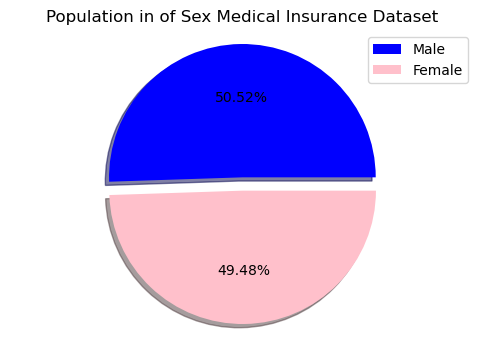

In [6]:
#Function that calulate the # of men and women in the dataset 
def analyze_sex(medical_insurance):
    male_count = 0
    female_count = 0
    #iterate through the sex column in the dataset 
    for sex in medical_insurance.sex:
        if sex == 'male':
            male_count += 1
        elif sex == 'female':
            female_count += 1
    return male_count, female_count

male_count,female_count = analyze_sex(medical_insurance)

male_prop = round(male_count / len(medical_insurance) * 100, 2)
female_prop = round(female_count / len(medical_insurance) * 100, 2)

print(f'There are {male_count} males and {female_count} in the dataset. Men take up {male_prop}% and woment take up {female_prop}%')

#Visualize data
labels = ['Male', 'Female']
sizes = [male_count, female_count]
colors = ['blue', 'pink']
#explore the 1st slice (Male)
explode = (0.1, 0)

plt.figure(figsize=(6,4))
plt.pie(sizes, explode=explode, colors=colors, autopct='%.2f%%', shadow=True)
plt.legend(labels)
plt.title('Population in of Sex Medical Insurance Dataset')
plt.axis('equal')
plt.show()



The data is eveningly distributed amongst men and women. 

There are slightly more males than females but this small amount should not effect our anaylsis.


The Average Patient's BMI: 30.66


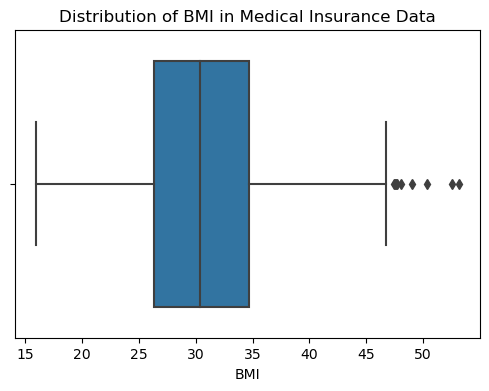

count     1338.00
unique        NaN
top           NaN
freq          NaN
mean        30.66
std          6.10
min         15.96
25%         26.30
50%         30.40
75%         34.69
max         53.13
Name: bmi, dtype: float64


In [7]:
#Caluclate function that analyzes the average patients BMI 
def analyze_bmi(medical_insurance):
    total_bmi = 0
    for bmi in medical_insurance.bmi:
        total_bmi += bmi 
    return (f"The Average Patient's BMI: {round(total_bmi/len(medical_insurance), 2)}")

analyze_bmi = analyze_bmi(medical_insurance)

print(analyze_bmi)

#Visualize Data
plt.figure(figsize=(6,4))
sns.boxplot(x=medical_insurance.bmi)
plt.xlabel('BMI')
plt.title("Distribution of BMI in Medical Insurance Data")
plt.show()


print(descriptive_stats['bmi'])


The average BMI is approximately 30.66. BMI values above 30 are generally classified as overweight, indicating that on average the patients within this data could be considered overweight. 

We have a wide range of BMI values, with the lowest being 15.96 and the heights being 53.13. 

The median is 30.40 which would suggest that 50% of our patients are below this point. 75% are below 34.69. 


Considering this information - I am interested in the learning relationship between BMI and Insurance Cost and BMI and SEX. 


There are 274 patients that smoke and 1064 that do not smoke.


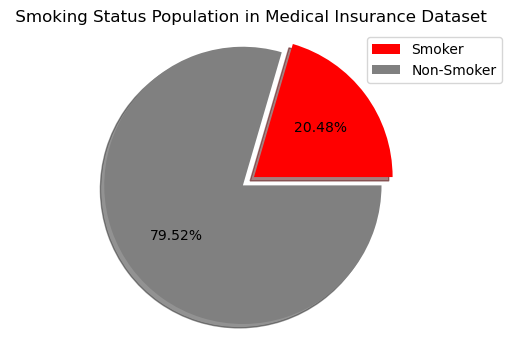

count     1338
unique       2
top         no
freq      1064
mean       NaN
std        NaN
min        NaN
25%        NaN
50%        NaN
75%        NaN
max        NaN
Name: smoker, dtype: object


In [8]:
#Create function analyze how many smokers are in the dataset 
def analyze_smokers_vs_non_smokers(medical_insurance):
    smoker_count = 0 
    non_smoker_count = 0 
    for smoker in medical_insurance.smoker:
        if smoker == 'yes':
            smoker_count += 1
        elif smoker == 'no': 
            non_smoker_count += 1
    return smoker_count, non_smoker_count 

smoker_count, non_smoker_count = analyze_smokers_vs_non_smokers(medical_insurance)

print(f'There are {smoker_count} patients that smoke and {non_smoker_count} that do not smoke.')


#Visualize Data 
labels1 = ["Smoker", 'Non-Smoker']
counts = [smoker_count, non_smoker_count]
colors1 = ['red', 'grey']

plt.figure(figsize=(6,4))
plt.pie(counts, explode=explode, colors=colors1, autopct='%.2f%%', shadow=True)
plt.title(' Smoking Status Population in Medical Insurance Dataset')
plt.legend(labels1, loc='upper right', bbox_to_anchor=(1.06, 1))
plt.axis('equal')
plt.show()


print(descriptive_stats['smoker'])


A large portion of patients in the dataset do not smoke 

Interested in the dynamics of patients who smoke and their charges compared to patients that do not smoke. 


364 patients live in the southeast.
325 patients live in the southwest.
325 patients live in the northwest.
324 patients live in the northeast.


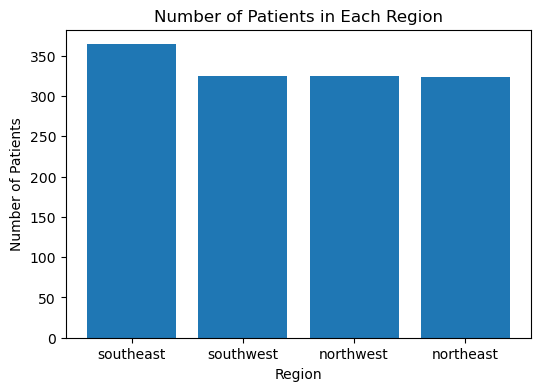

In [9]:
#Calculate how many people stay in each region 
def count_patients_by_region(medical_insurance):
    #use value_counts to count occurences of each region
    region_counts = medical_insurance['region'].value_counts()
    #create a dictonary to store results 
    patients_by_region = {}
    #Iterate over the unique regions and print the count for each
    for region, count in region_counts.items():
        patients_by_region[region] = count
    return patients_by_region
    
patients_by_region = count_patients_by_region(medical_insurance)

for region, count in patients_by_region.items():
    print(f'{count} patients live in the {region}.')

colors2 = ['red', 'blue', 'green', 'orange']
#Visualize data 
plt.figure(figsize=(6, 4))
plt.bar(patients_by_region.keys(), patients_by_region.values())
plt.xlabel('Region')
plt.ylabel('Number of Patients')
plt.title('Number of Patients in Each Region')
plt.show()

There are more patients in the southeast than any other region. 

What are there associated medical cost? Is there a signficant difference? 

The average cost of insurance: $13270.42


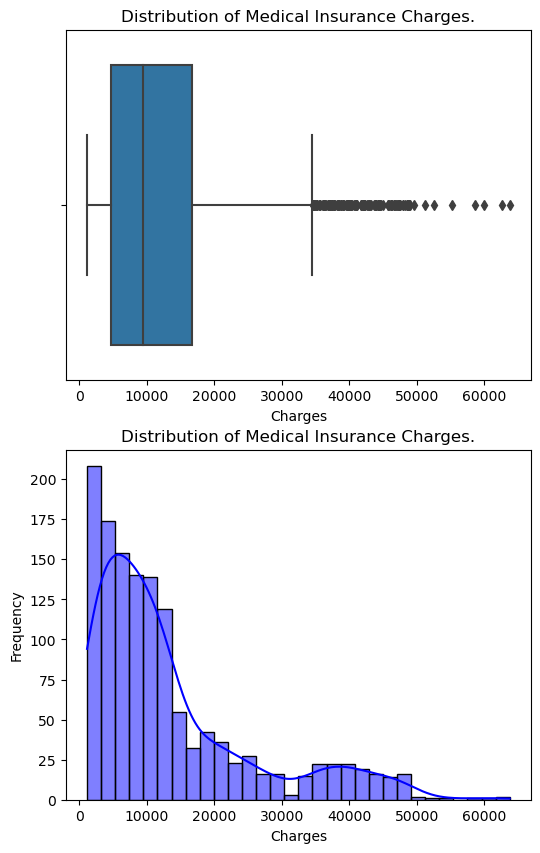

count      1338.00
unique         NaN
top            NaN
freq           NaN
mean      13270.42
std       12110.01
min        1121.87
25%        4740.29
50%        9382.03
75%       16639.91
max       63770.43
Name: charges, dtype: float64


In [10]:
#Caluclate the Average Charges Amongst the Patients 
def calculate_average_charges():
    total_charges = 0 
    for charge in medical_insurance.charges:
        total_charges += charge 
        average_charge = round(total_charges / len(medical_insurance), 2)
    return (f'The average cost of insurance: ${average_charge}')

print(calculate_average_charges())

#Visualize Data
plt.figure(figsize=(6,10))
plt.subplot(2,1,1)
sns.boxplot(x=medical_insurance.charges)
plt.xlabel('Charges')
plt.title('Distribution of Medical Insurance Charges.')

plt.subplot(2,1,2)
sns.histplot(medical_insurance['charges'], bins=30, kde=True, color='blue')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Medical Insurance Charges.')
plt.show()

print(descriptive_stats['charges'])

The average charge for Medical Insurance in the dataset is $13,270.42. 

The standard deviation is approximately $12,110.01 which suggest a significant amount of variability within insurance charges that could potentially help us identify any trends that affect the cost of insurance. 

75% of the dataset pay $16,639.91 or less. However, there exist outliers within the data. May be a good idea to highlight the outliers and identify what could be the cause of higher rates. 

The distribution of insurance cost is right skewed with the tail toward higher charges. 



In [11]:
#Create dataframe for high cost patients of $20000 or more
high_cost_patients = medical_insurance[medical_insurance['charges'] >= 20000].reset_index()

print(len(high_cost_patients))


273


There are 273 patients that pay more than $20000 in medical insurance cost. 


In [12]:
#count how many people in the high cost insurance smoke 
smoker_counts_high_cost = high_cost_patients['smoker'].value_counts().reset_index()

print(smoker_counts_high_cost)

  index  smoker
0   yes     212
1    no      61


    level_0  index  age     sex     bmi  children smoker     region  \
0         0      3   33    male  22.705         0     no  northwest   
1         1      9   60  female  25.840         0     no  northwest   
2        11     45   55    male  37.300         0     no  southwest   
3        18     62   64    male  24.700         1     no  northwest   
4        26    102   18  female  30.115         0     no  northeast   
..      ...    ...  ...     ...     ...       ...    ...        ...   
56      234   1142   52  female  24.860         0     no  southeast   
57      243   1206   59  female  34.800         2     no  southwest   
58      246   1211   39    male  34.100         2     no  southeast   
59      254   1258   55    male  37.715         3     no  northwest   
60      271   1328   23  female  24.225         2     no  northeast   

        charges  
0   21984.47061  
1   28923.13692  
2   20630.28351  
3   30166.61817  
4   21344.84670  
..          ...  
56  27117.99378  
57 

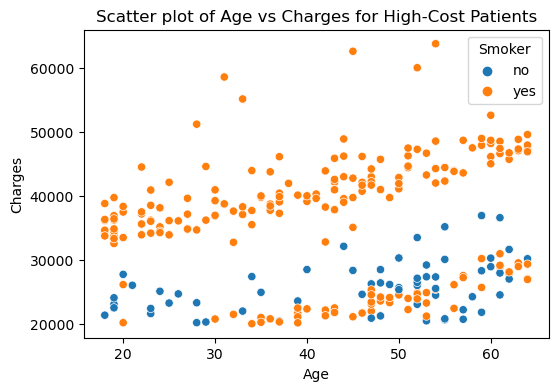

In [13]:
non_smoker_high_cost_patients = high_cost_patients[high_cost_patients['smoker'] == 'no'].reset_index()
print(non_smoker_high_cost_patients)

#Visualization
plt.figure(figsize=(6, 4))
sns.scatterplot(x='age', y='charges', data=high_cost_patients, hue='smoker')
plt.title('Scatter plot of Age vs Annual Charges for High-Cost Patients')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker', loc='upper right')
plt.show()

The Scatterplot above indicate that a large portion of patients who pay more than $20000 in insurance cost either smoke and/or are older in age. A vast majority of those individuals smoke. However, to futher identify the charges of individuals who don't smoke and thier associated charges we'll have to perform further analysis. 

Its important to highlight that according to our smoking variable, 20% of our data included smokers. - in the high insurance cost database 78% of our patients smoked, which  suggest that smoking impacts insurance cost. Need to perform additional analyses to definitively conclude that smoking and age impacts insurance cost. 

In [14]:
#Create a function to group patients by ages
def group_by_age(medical_insurance):
    # Define age brackets
    age_bins = [18, 26, 36, 46, 56, 66]
    age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

    # Add a new column 'Age Group' to the DataFrame
    medical_insurance['Age Group'] = pd.cut(medical_insurance['age'], bins=age_bins, labels=age_labels, right=False)

    # Add a new column 'Age Group' to the DataFrame
    age_groups = medical_insurance.groupby('Age Group').apply(lambda group: group.to_dict(orient='records')).to_dict()
    
    return age_groups

#Create variable and call function 
age_groups = group_by_age(medical_insurance)


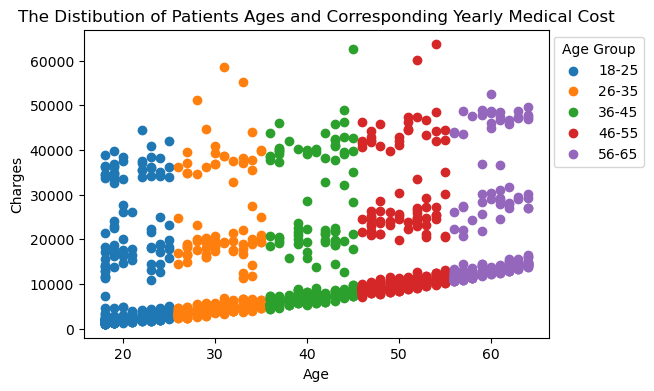

There are 306 patients in the 18-25 age group.
There are 268 patients in the 26-35 age group.
There are 264 patients in the 36-45 age group.
There are 284 patients in the 46-55 age group.
There are 216 patients in the 56-65 age group.


In [15]:
#Scatter plot 
plt.figure(figsize=(6,4))
for age_group, data in age_groups.items():
    ages=[entry['age'] for entry in data]
    charges=[entry['charges'] for entry in data]
    plt.scatter(ages, charges, label=age_group)

#Create Labels and Title 
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('The Distibution of Patients Ages and Corresponding Yearly Medical Insurance Cost')
plt.legend(title='Age Group', bbox_to_anchor=(1.22, 1), loc='upper right')
plt.show()


#Print the count of patients in each age group
for age_group, data, in age_groups.items():
    num_patients = len(data)
    print(f'There are {num_patients} patients in the {age_group} age group.')
    


I decided to group the patients by age to further understand the cost of insurance as one gets older - according to the scatterplot above, we can see that the cost of insurance based on age varies. However, it appears as the older a patient becomes, the more they pay in insurance. Run a correlation analysis to identify the relationship between ages and charges. 

In [16]:
age_charges_corr = medical_insurance['age'].corr(medical_insurance['charges'])
print(f'Correlation between Age and Charges: {age_charges_corr}')



Correlation between Age and Charges: 0.29900819333064765


There is a slight positive correlation. To gather further analysis, I will capture the average cost of insurance per age group to identify whether or not as one gets older they pay more in medical insurance. 

# Part 5: Exploratory Data Analysis (EDA):
    
                        •Perform EDA to uncover patterns, trends, and relationships in data. 
                                   •Use visualization to aid in understanding
 

In [17]:
#Calculate the Average Yearly Cost of Insurance for Each Age Group
def calculate_average_charges_by_age(medical_insurance, decimal_places=2):
    # Call the group_by_age function to group patients by age
    age_groups = group_by_age(medical_insurance)
    # Create a dictionary to store average charges for each age group
    average_charges_by_age = {}
    # Iterate through age groups
    for age_group, patients in age_groups.items():
        # Calculate the average charges for the current age group
        total_charges = sum(patient['charges'] for patient in patients)
        average_charges = total_charges / len(patients) if len(patients) > 0 else 0
        # Round the average charges to the specified decimal places
        rounded_average_charges = round(average_charges, decimal_places)
        # Store the rounded result in the dictionary
        average_charges_by_age[age_group] = rounded_average_charges
    return average_charges_by_age

# Create variable and call the new function
average_charges_by_age = calculate_average_charges_by_age(medical_insurance, decimal_places=2)

#Iterate over variable and print results 
for age_group, average_charges in average_charges_by_age.items():
    print(f'The Average Yearly Cost of Medical Insurance for individuals in age group {age_group} is: ${average_charges}')


The Average Yearly Cost of Medical Insurance for individuals in age group 18-25 is: $9087.02
The Average Yearly Cost of Medical Insurance for individuals in age group 26-35 is: $10495.16
The Average Yearly Cost of Medical Insurance for individuals in age group 36-45 is: $13493.49
The Average Yearly Cost of Medical Insurance for individuals in age group 46-55 is: $15986.9
The Average Yearly Cost of Medical Insurance for individuals in age group 56-65 is: $18795.99


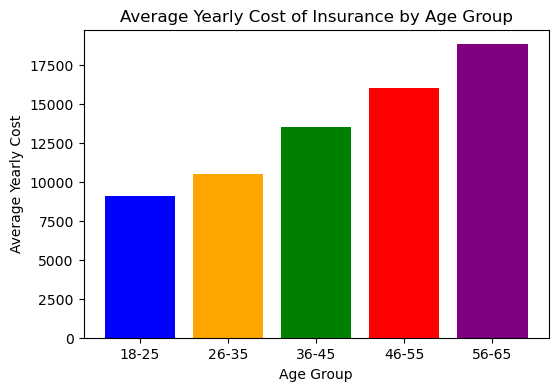

In [18]:
age_groups_labels = list(average_charges_by_age.keys())
y_average_charges = list(average_charges_by_age.values())
colors3 = ['blue', 'orange', 'green', 'red', 'purple']
#Visualize Data 
plt.figure(figsize=(6,4))
plt.bar(age_groups_labels, y_average_charges, color=colors3)
plt.xlabel('Age Group')
plt.ylabel('Average Yearly Cost')
plt.title('Average Yearly Cost of Medical Insurance by Age Group')
plt.show()


Those under 25 years of age on average pay $9100 in Medical Insurance Cost per Year. As patients get older and enter into different age brackets, rates slightly increase. 

which suggest that a patients age can affect ones annual insurance cost. 

In [20]:
#Calculate the average cost of insurance for men and women 
def calculate_average_charge_by_sex(medical_insurance, decimal_places=2):
    #Create a dictionary to store average charges for each gender 
    average_charges_by_sex = {}
    
    #iterate through sex
    for sex in medical_insurance['sex'].unique():
        #Filter the Datafram for the current sex 
        sex_data = medical_insurance[medical_insurance['sex'] == sex]
        
        #Calculate the average charges for the current sex 
        total_charges = sex_data['charges'].sum()
        average_charges = total_charges / len(sex_data) if len(sex_data) > 0 else 0 
        
        #Round the average charges to the specified decimal places 
        rounded_average_charges_by_sex = round(average_charges, decimal_places)
        
        average_charges_by_sex[sex] = rounded_average_charges_by_sex 
        
    return average_charges_by_sex 

#Create variable 
average_charges_by_sex = calculate_average_charge_by_sex(medical_insurance, decimal_places=2)

#iterate over variable and print results 
for sex, average_charges in average_charges_by_sex.items():
    print(f'The Average Yearly Cost of Medical Insurance for {sex}s: ${average_charges}')

    

The Average Yearly Cost of Medical Insurance for females: $12569.58
The Average Yearly Cost of Medical Insurance for males: $13956.75


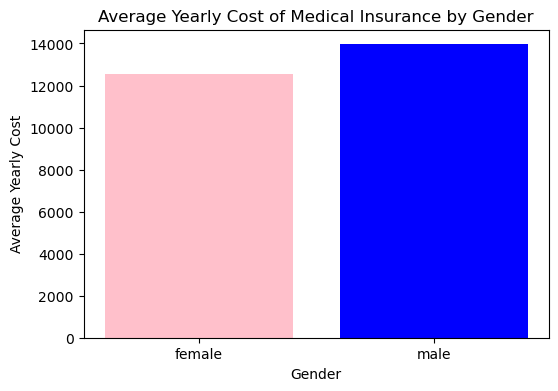

Difference in charges between females and males: $-1387.17
Difference in charges between males and females: $1387.17


In [21]:
#Visualize Data 
colors4 = ['pink', 'blue']
plt.figure(figsize=(6,4))
plt.bar(average_charges_by_sex.keys(), average_charges_by_sex.values(), color=colors4)
plt.xlabel('Gender')
plt.ylabel('Average Yearly Cost')
plt.title('Average Yearly Cost of Medical Insurance by Gender')
plt.show()

#Calculate the difference in charges 
for sex1, avg_charge1 in average_charges_by_sex.items():
    for sex2, avg_charge2 in average_charges_by_sex.items():
        if sex1 != sex2:
            charge_difference = avg_charge1 - avg_charge2
            print(f'Difference in charges between {sex1}s and {sex2}s: ${charge_difference}')


Men pay approximately $1,387.17 more than women. Could BMI play a factor?

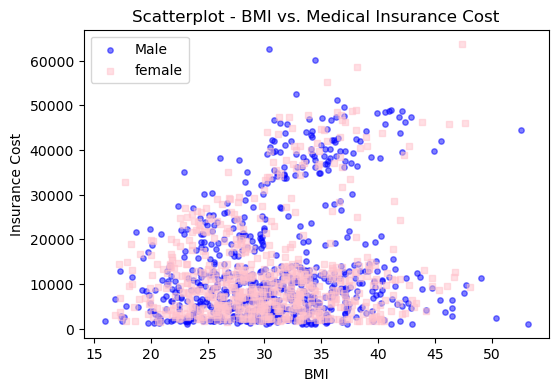

In [22]:
#Create a scatterplot to determine if their is relationship between bmi and high cost of insurance(seperate male and female plots)
medical_insurance_male = medical_insurance[medical_insurance['sex'] == 'male']
medical_insurance_female = medical_insurance[medical_insurance['sex'] == 'female']

#Visualize 
plt.figure(figsize=(6,4))
plt.scatter(medical_insurance_male['bmi'], medical_insurance_male['charges'], c='blue', label='Male', marker='o', s=15, alpha=0.5)
plt.scatter(medical_insurance_female['bmi'], medical_insurance_female['charges'], c='pink', label='female', marker='s', s=15, alpha=0.5)

plt.title('Scatterplot - BMI vs. Medical Insurance Cost')
plt.xlabel('BMI')
plt.ylabel('Insurance Cost')
plt.legend()
plt.show()


The Average BMI for males is: 30.94
The Average BMI for females is: 30.38


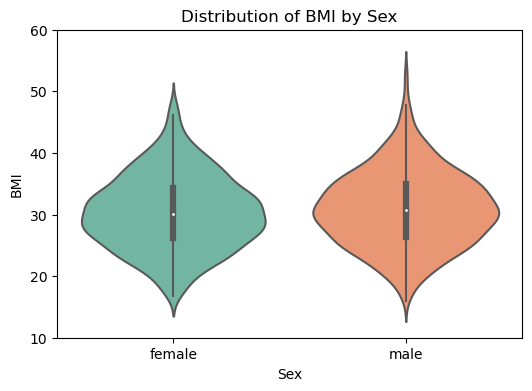

In [21]:
#Create variable to calculate the average BMI for women and men
average_bmi_by_sex = medical_insurance.groupby('sex')['bmi'].mean()
print(f"The Average BMI for males is: {average_bmi_by_sex['male']:.2f}")
print(f"The Average BMI for females is: {average_bmi_by_sex['female']:.2f}")  

#Visualize(boxplot side by side)
plt.figure(figsize=(6,4))
sns.violinplot(x='sex', y='bmi', data=medical_insurance, palette='Set2')
plt.ylim(10, 60)
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.title('Distribution of BMI by Sex')
plt.show()


According to the violin plot - the variation of BMI between male and female are primarly the same. There is no indication that would suggest BMI affects the cost of insurance between men and women. 

From our summary statistics, we identified that majority of indiviuals fall within the overweight catergory - lets take a closer look at the average cost of insurance per BMI range. 

In [23]:
#Calculate Insurance Cost Based on BMI range: Underweight, normal, overweight, obese, extremely obese 
def calculate_average_bmi_charges(medical_insurance, decimal_places=2):
    #Define BMI ranges 
    bmi_ranges = {
        'Underweight': (0, 18.5), 
        'Normal': (18.5, 24.9),
        'Overweight': (25, 29.9),
        'Obese': (30, 34.9), 
        'Extremely Obese': (35, float('inf'))
    }
    #Create a new column 'bmi_category' based on BMI ranges 
    medical_insurance['bmi_category'] = pd.cut(medical_insurance['bmi'],
                                               bins=[-float('inf')] + [range[1] for range in bmi_ranges.values()],
                                               labels=bmi_ranges.keys())
    #Calculate average charges for each BMI category

    avg_charges_by_bmi = medical_insurance.groupby('bmi_category')['charges'].mean().round(decimal_places)
    
    return avg_charges_by_bmi

avg_charges_by_bmi = calculate_average_bmi_charges(medical_insurance, decimal_places=2)

#Iterate over the avg_charges_by_bmi and print results 
for bmi_category, avg_charge in avg_charges_by_bmi.items():
    print(f'The Average cost of insurance for Patients that fall in the category {bmi_category}: ${avg_charge}.')
                                                   


    
    

The Average cost of insurance for Patients that fall in the category Underweight: $8657.62.
The Average cost of insurance for Patients that fall in the category Normal: $10404.9.
The Average cost of insurance for Patients that fall in the category Overweight: $11006.81.
The Average cost of insurance for Patients that fall in the category Obese: $14217.62.
The Average cost of insurance for Patients that fall in the category Extremely Obese: $17076.96.


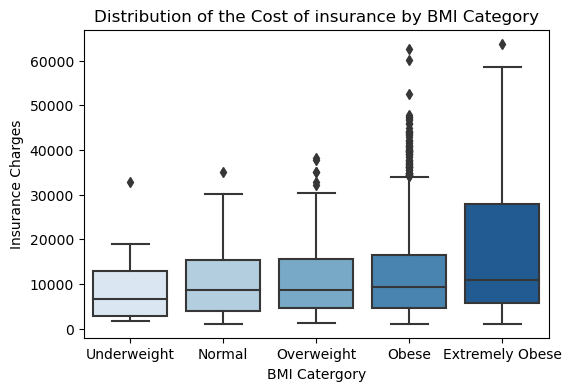

         BMI Range  Mean Charges  Median Charges  Mode Charges
0      Underweight   8657.620652      6640.54485     1621.3402
1           Normal  10404.900084      8604.48365     1121.8739
2       Overweight  11006.809989      8659.37800     1252.4070
3            Obese  14217.616975      9411.00500     1639.5631
4  Extremely Obese  17076.960199     10959.69470     1141.4451


In [25]:
#Visualization

plt.figure(figsize=(6,4))
sns.boxplot(x='bmi_category', y='charges', data=medical_insurance, order=avg_charges_by_bmi.index, palette='Blues')
plt.title('Distribution of the Cost of insurance by BMI Category')
plt.xlabel('BMI Catergory')
plt.ylabel('Insurance Charges')
plt.show()

#Calculate mean, median and mode for each
summary_stats = medical_insurance.groupby('bmi_category')['charges'].agg(['mean', 'median', lambda x: x.mode().iloc[0]]).reset_index()
summary_stats.columns = ['BMI Range', 'Mean Charges', 'Median Charges', 'Mode Charges']
print(summary_stats)


The Average Cost of Insurance for patients within each BMI range would suggest that there is a correlation between ones BMI and Annual Medical Insurance charges. However, after further analysis and a visual representation of that data suggest that the distrubition amongst the various ranges are primarly the same - Between Underweight - Obese, 75% of the patients pay approximately $14000 in insurance cost or - while 75% of Extremely Obese patients pay $25000 or less. 
 
Several boxplots represent outliers - however, from our analysis earlier, a large portion of those individuals with high insurance cost are smokers and/or older in age and we can take that into account when understanding the relationship amongst Medical Insurance Charges. 


In [26]:
#Calculate average cost by number of children 
average_cost_by_children = medical_insurance.groupby('children')['charges'].mean().reset_index()

#iterate over the medical_insurance 
for index, row in average_cost_by_children.iterrows():
    children = row['children']
    average_charge = row['charges']
    print(f"Average medical insurance cost for {children} children: ${average_charge:.2f}")
    

Average medical insurance cost for 0.0 children: $12365.98
Average medical insurance cost for 1.0 children: $12731.17
Average medical insurance cost for 2.0 children: $15073.56
Average medical insurance cost for 3.0 children: $15355.32
Average medical insurance cost for 4.0 children: $13850.66
Average medical insurance cost for 5.0 children: $8786.04


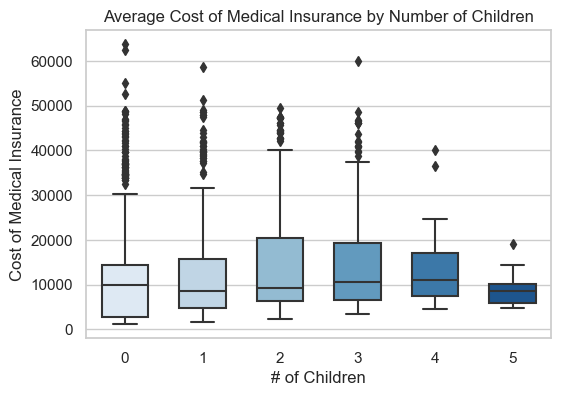

In [27]:
#Set plotting style
sns.set(style='whitegrid')

#Visualize 
plt.figure(figsize=(6,4))
sns.boxplot(x='children', y='charges', data=medical_insurance, width=0.6, palette='Blues')
plt.xlabel('# of Children')
plt.ylabel('Cost of Medical Insurance')
plt.title('Average Cost of Medical Insurance by Number of Children')
plt.show()

            

There seems to be a general increase in average medical insurance costs as the number of children increases up to 3 children.

The average cost decreases for families with 4 and 5 children, particularly for families with 5 children. Why? 


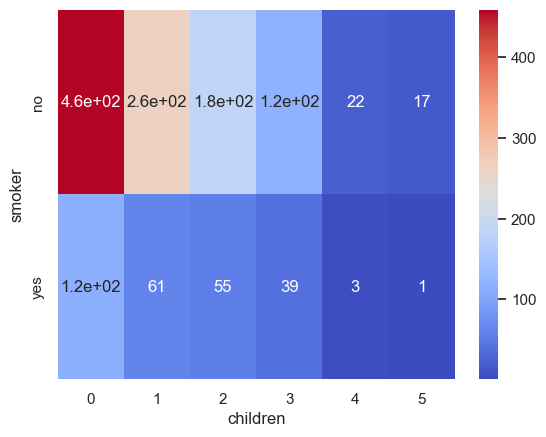

In [26]:
#Visualize Children/Smoker
smoker_vs_children = pd.crosstab(medical_insurance['smoker'], medical_insurance['children'])
sns.heatmap(smoker_vs_children, annot=True, cmap='coolwarm')
plt.show()




It's important to note that within the boxplots visuals - there are a number of outliers for each label. To understand the relationship between # of children and smoker, the heatmap displays that smoking likely decreases with the number of children one has. 

It is also an additional indicator that smoking affects ones cost of medical insurance. Further analysis would be needed to indicate whether the number of children drives smoking habits. 



In [27]:
#Caluclate the Average Insurance for Smokers and Non Smokers 
#Create Variable 
average_cost_by_smoker_status = medical_insurance.groupby('smoker')['charges'].mean().reset_index()

#Iterate over variable 
for index, row in average_cost_by_smoker_status.iterrows():
    smoker_status = row['smoker']
    average_charges = row['charges']
    print(f"The Average Cost of Insurance for Patients who checked {smoker_status} to smoking: ${average_charges:.2f}.")
    


    

The Average Cost of Insurance for Patients who checked no to smoking: $8434.27.
The Average Cost of Insurance for Patients who checked yes to smoking: $32050.23.


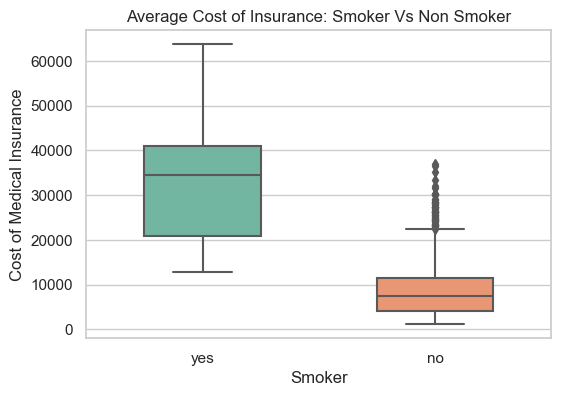

In [28]:
#Visualize 
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=medical_insurance, width=0.5, palette='Set2')
plt.xlabel('Smoker')
plt.ylabel('Cost of Medical Insurance')
plt.title('Average Cost of Insurance: Smoker Vs Non Smoker')
plt.show()


In [29]:
# Calculate the average charges for smokers and non-smokers
average_charges_smokers = medical_insurance[medical_insurance['smoker'] == 'yes']['charges'].mean()
average_charges_non_smokers = medical_insurance[medical_insurance['smoker'] == 'no']['charges'].mean()

# Calculate the difference
average_difference = average_charges_smokers - average_charges_non_smokers

# Print the result
print(f"On average, smokers pay an additional ${average_difference:.2f} in insurance cost.")




On average, smokers pay an additional $23615.96 in insurance cost.


In [30]:
#Calulate the Average charges of insurance per region 
def average_charges_per_region(medical_insurance, decimal_places=2):
    #Create empty dictionary to store charges for each region
    region_charges = {
        'northwest': [],
        'northeast': [], 
        'southwest': [], 
        'southeast': [],
    }
    #iterate over rows in dataframe
    for index, row in medical_insurance.iterrows():
        region = row['region']
        charges = row['charges']
        
        #Append charges to corresponding region list 
        region_charges[region.lower()].append(charges)
        
        #Calculate the average charges for each region 
        average_charges_per_region = {region: round(sum(charges)/ len(charges), decimal_places) if len(charges) > 0 else 0
                                 for region, charges in region_charges.items()}
    return average_charges_per_region

#create variable and call function 
average_charges_per_region = average_charges_per_region(medical_insurance, decimal_places=2)


#iterate over region charges and print 
for region, average_charges in average_charges_per_region.items():
    print(f'The average cost for insurance in the {region.capitalize()}: ${average_charges}.')


        


The average cost for insurance in the Northwest: $12417.58.
The average cost for insurance in the Northeast: $13406.38.
The average cost for insurance in the Southwest: $12346.94.
The average cost for insurance in the Southeast: $14735.41.


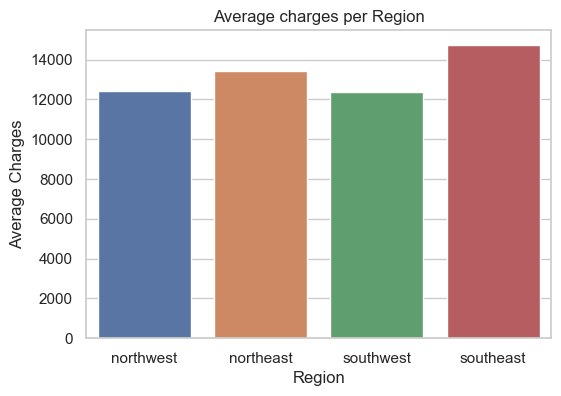

In [31]:
#Create Visualization to compare region cost 
region_df = pd.DataFrame(list(average_charges_per_region.items()), columns=['Region', 'Average Charges'])

# Plotting a side-by-side bar graph
plt.figure(figsize=(6,4))
sns.barplot(x='Region', y='Average Charges', data=region_df)
plt.title('Average charges per Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()


In [32]:
age_region_counts = medical_insurance.groupby(['Age Group', 'region']).size().unstack(fill_value=0)


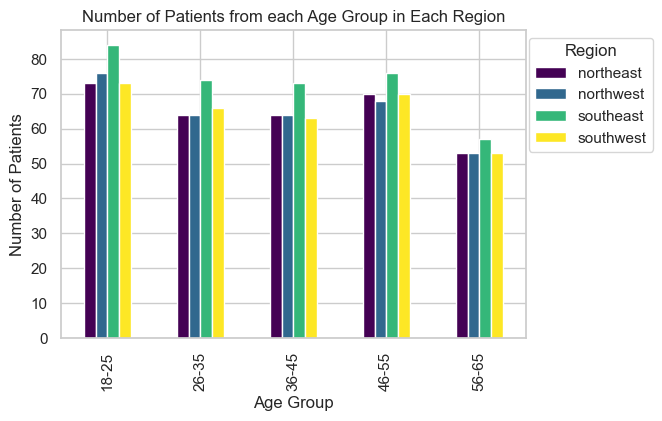

In [33]:
#Visualization
age_region_counts.plot(kind='bar', figsize=(6,4), colormap='viridis')
plt.title('Number of Patients from each Age Group in Each Region')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.legend(title='Region', bbox_to_anchor=(1.29, 1), loc='upper right')
plt.show()

        

# PART 6: Conclusions 
              •Summarize key findings and insights from the analysis. 
              •Discuss notable trends/patterns discovered.
              

1. Smoking and Insuranec Cost 

Smokers, on average pay $20000 more in insurance costs compared to non smokers. This indicates a significant financial impact associated with smoking status. 

2. Insurance Costs and BMI

BMI has a slight positive correlation - however, there is no indication that ones BMI has an impact on his/her medical insurance cost 

4. Region and Insurance Cost 

The Southeast has the highest average insurance, while the Northwest has the lowest. 

5. Sex and Cost of Insurance 

Men pay approximately $1400 in medical insurance charges. 

6. Age and Cost of Insurance 

There is a noticeable increase in the average yearly cost of medical insurance as individuals move to higher age groups.
The highest average cost is observed in the 56-65 age group.



    